## Analyze ActBlue mid-year filing and log some stats

Time the notebook

In [239]:
start = datetime.datetime.now()

Define logging function for writing output

In [240]:
with open("../output/log.txt", "w") as f:
    f.write("")
    
def log(obj, description):
    print(description + ":")
    with open("../output/log.txt", "a") as f:
        f.write(f"{description}:\n\n{obj}\n\n---\n")
    return obj

Set some viewing options

In [241]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 500)

Read dataframe of filings

In [242]:
filings = (
    pd.read_csv("../data/filings.csv")
)

filings

,committee_id,filing_id,cycle,form_type,date_filed,date_coverage_to,date_coverage_from,report_title,report_period,fec_uri,paper,amended,amended_uri,is_amendment,original_filing,original_uri,committee_type,contributions_total,cash_on_hand,disbursements_total,receipts_total
0,C00401224,1190211,2016,F3,2017-11-03,2016-11-28,2016-10-20,POST-GENERAL,PG,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1190211/,False,False,NaN,True,1132265.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1132265/,W,6.930615e+07,24023158.64,7.047363e+07,7.088497e+07
1,C00401224,1167570,2016,F3,2017-06-27,2016-10-19,2016-10-01,PRE-GENERAL,PREG,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1167570/,False,False,NaN,True,1118321.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1118321/,W,3.898875e+07,23611816.12,3.665323e+07,4.108648e+07
2,C00401224,1166534,2016,F3,2017-06-19,2016-12-31,2016-11-29,YEAR-END,YE,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1166534/,False,False,NaN,True,1144458.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1144458/,W,1.466555e+07,24071137.23,1.537881e+07,1.542679e+07
3,C00401224,1166544,2016,F3,2017-06-19,2016-11-28,2016-10-20,POST-GENERAL,PG,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1166544/,False,True,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1190211/,True,1132265.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1132265/,W,6.930615e+07,24023158.64,7.047363e+07,7.088497e+07
4,C00401224,1164817,2016,F3,2017-06-05,2016-10-19,2016-10-01,PRE-GENERAL,PREG,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1164817/,False,True,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1167570/,True,1118321.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1118321/,W,3.898875e+07,23611816.12,3.665323e+07,4.108648e+07
5,C00401224,1148387,2016,F3,2017-02-09,2016-07-31,2016-07-01,AUG MONTHLY,M8,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1148387/,False,False,NaN,True,1096262.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1096262/,W,2.794111e+07,20424886.90,2.821437e+07,2.869350e+07
6,C00401224,1148219,2016,F3,2017-02-08,2016-05-31,2016-05-01,JUN MONTHLY,M6,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1148219/,False,False,NaN,True,1079540.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1079540/,W,3.641572e+07,20262477.34,3.797036e+07,3.701039e+07
7,C00401224,1148088,2016,F3,2017-02-08,2016-04-30,2016-04-01,MAY MONTHLY,M5,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1148088/,False,False,NaN,True,1074053.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1074053/,W,4.527989e+07,21222446.76,4.297528e+07,4.591715e+07
8,C00401224,1147747,2016,F3,2017-02-06,2016-03-31,2016-03-01,APR MONTHLY,M4,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1147747/,False,False,NaN,True,1066480.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1066480/,W,6.840264e+07,18280575.35,6.904940e+07,6.971490e+07
9,C00401224,1144458,2016,F3,2017-01-31,2016-12-31,2016-11-29,YEAR-END,YE,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1144458/,False,True,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1166534/,NaN,NaN,NaN,W,1.466555e+07,26410075.37,1.537881e+07,1.542679e+07


Get only the mid-year reports

In [243]:
midyears = (
    filings
    # remove filings that have been superceded by subsequent filings
    .loc[
        lambda x: x['amended'] == False
    ]
    .loc[
        lambda x: x["report_title"].str.contains("MID-YEAR", na = False)
    ]
)

midyears

,committee_id,filing_id,cycle,form_type,date_filed,date_coverage_to,date_coverage_from,report_title,report_period,fec_uri,paper,amended,amended_uri,is_amendment,original_filing,original_uri,committee_type,contributions_total,cash_on_hand,disbursements_total,receipts_total
28,C00401224,1034155,2016,F3,2015-11-23,2015-06-30,2015-06-23,MID-YEAR,NaN,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1034155/,False,False,NaN,True,1020166.0,http://docquery.fec.gov/cgi-bin/dcdev/forms/C00401224/1020166/,W,10048788.95,13202797.05,10904153.39,10201906.98


Load donors with their latest aggregate contributions per candidate

In [244]:
latest_contribs = pd.read_csv(
    "../output/latest_contribs.csv"
)

Load candidates file

In [245]:
candidates = pd.read_csv(
    "../data/candidates.csv"
)

Read dataframe of all actblue contributions

In [246]:
actblue = pd.read_csv(
    "../output/clean_actblue.csv",
    dtype = {
        "filing_id": "object",
        "contributor_organization_name": "object"
    },
    parse_dates = ['contribution_date',]
)

actblue

,entity_type,filer_committee_id_number,filing_id,transaction_id,contribution_date,contribution_amount,contribution_aggregate,contributor_organization_name,contributor_first_name,contributor_last_name,contributor_street_1,contributor_street_2,contributor_state,contributor_zip_code,contributor_state.1,contributor_employer,contributor_occupation,contribution_purpose_descrip,memo_text_description,donor_id,committee_id,committee_name,candidate_name,latest_contribution_aggregate
0,IND,C00401224,1034155,SA11AI_28202360,2015-06-29,5.00,35.00,NaN,HOMA,A. HASHEMI,22 CLINTON AVE 9,NaN,CT,06901,CT,NOT EMPLOYED,NOT EMPLOYED,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),HOMA|A HASHEMI|06901,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,35.00
1,IND,C00401224,1034155,SA11AI_28249728,2015-06-30,5.00,35.00,NaN,HOMA,A. HASHEMI,22 CLINTON AVE 9,NaN,CT,06901,CT,NOT EMPLOYED,NOT EMPLOYED,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),HOMA|A HASHEMI|06901,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,35.00
2,IND,C00401224,1034155,SA11AI_28108486,2015-06-27,25.00,25.00,NaN,SHERI,A. OLSON,4008 SW ARROYO CT,NaN,WA,98146,WA,SELF,ARCHITECT,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),SHERI|A OLSON|98146,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,25.00
3,IND,C00401224,1034155,SA11AI_28091589,2015-06-27,15.00,30.00,NaN,MARY,A. TODD,24701 NE 228TH CIRCLE,NaN,WA,98604,WA,KAISER PERMANENTE,NURSE PRACTITIONER,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),MARY|A TODD|98604,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,30.00
4,IND,C00401224,1034155,SA11AI_28021895,2015-06-25,15.00,75.00,NaN,JAMES,A[LEN,20 ANNE PARK,NaN,SC,29150,SC,NONE,NONE,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),JAMES|A[LEN|29150,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,75.00
5,IND,C00401224,1034155,SA11AI_28151451,2015-06-28,35.00,75.00,NaN,JAMES,A[LEN,20 ANNE PARK,NaN,SC,29150,SC,NONE,NONE,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),JAMES|A[LEN|29150,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,75.00
6,IND,C00401224,1034155,SA11AI_28253761,2015-06-30,5.00,45.00,NaN,JOHN,"AACKERMAN, M.D.",805 SENDA VERDA UNIT E,NaN,CA,93105,CA,NONE,NONE,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),JOHN|AACKERMAN M D|93105,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,45.00
7,IND,C00401224,1034155,SA11AI_28238877,2015-06-30,5.00,30.00,NaN,JOHN,AANRUD,1221 NE 28TH ST,NaN,IA,50021,IA,SELF,SELF,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),JOHN|AANRUD|50021,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,30.00
8,IND,C00401224,1034155,SA11AI_28249512,2015-06-30,5.00,30.00,NaN,CHERYL,AARON,55 E MARQUETTE RD,NaN,IL,606373930,IL,IDOT,TECHNICAL MANAGEMENT LL,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),CHERYL|AARON|60637,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,30.00
9,IND,C00401224,1034155,SA11AI_28355729,2015-06-30,50.00,100.00,NaN,ROBERTA,AARON,15730 S W 99TH COURT,NaN,FL,33157,FL,U. S. DEPT. OF STATE,U. S. CONSULAR AGENT,Earmark,Earmarked for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE (C00000935),ROBERTA|AARON|33157,C00000935,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,100.00


## Finally, some stats

Total donations per candidate

In [247]:
log((
    actblue
    ['candidate_name']
    .value_counts()
    .to_frame("Donations")
), "Total donations per candidate (among actblue donors only)")

Total donations per candidate (among actblue donors only):


,Donations
BERNIE 2016,104899
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,59412
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,19633
END CITIZENS UNITED PAC,15525
NANCY PELOSI FOR CONGRESS,5598
RUSS FOR WISCONSIN,4989
HOUSE MAJORITY PAC,3346
PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,3252
DONNA EDWARDS FOR SENATE,3048
KAMALA HARRIS FOR SENATE,2465


Distinct donors

In [248]:
donors_per_candidate = (
    actblue
    .groupby(["candidate_name"])
    ["donor_id"]
    .nunique()
    .sort_values(ascending = False)
    .to_frame("Distinct donors")
)

log(
    donors_per_candidate,
    "Distinct donors per candidate"
).sort_values('Distinct donors', ascending = False)

Distinct donors per candidate:


,Distinct donors
candidate_name,
BERNIE 2016,92057
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,46477
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,16411
END CITIZENS UNITED PAC,12599
NANCY PELOSI FOR CONGRESS,4998
RUSS FOR WISCONSIN,4705
HOUSE MAJORITY PAC,3106
DONNA EDWARDS FOR SENATE,2895
PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,2839


Donors per month

In [249]:
monthly = (
    actblue
    .groupby([
        pd.Grouper(
            key = 'contribution_date',
            freq = 'D' 
        ),
        'candidate_name'
    ])
    ["donor_id"]
    .nunique()
    .reset_index()
    .pivot(
        index = "candidate_name", 
        columns = 'contribution_date', 
        values = 'donor_id'
    )
    .fillna(0)
    .astype(int)
)

# format columns
monthly.columns = [ each.strftime("%-m/%d") for each in monthly.columns]
#monthly.columns = [ each.strftime("%B") for each in monthly.columns] #SWITCH TO THIS FOR 2020


log(monthly, "Number of distinct donors per month")

Number of distinct donors per month:


,6/23,6/24,6/25,6/26,6/27,6/28,6/29,6/30
candidate_name,,,,,,,,
21ST CENTURY DEMOCRATS,8,4,20,10,3,0,17,4
314 PAC,0,1,0,0,11,4,6,15
ADAM CLAYTON POWELL FOR CONGRESS,0,0,1,0,1,3,7,19
ADVANTAGE 2020,0,0,0,0,0,0,91,12
AKINYEMI AGBEDE FOR U,0,0,0,0,0,0,0,1
AL FRANKEN FOR SENATE,18,24,24,17,42,41,144,457
ALAN LOWENTHAL FOR CONGRESS,2,0,0,0,0,0,1,0
ALEX LAW FOR CONGRESS,0,0,0,0,0,6,3,6
AMERICA,0,0,0,0,0,1,0,2


Average donation size

In [250]:
res = (
    actblue
    .groupby('candidate_name')
    .pipe( 
        lambda grp: pd.DataFrame({
            "count": grp['transaction_id'].count(),
            "average_donation": grp["contribution_amount"].mean().round(2),
            "median_donation": grp["contribution_amount"].median().round(2)
        })
    )
    .sort_values(
        'count',
        ascending = False
    )
)

log(res, "Average ActBlue donation size")

Average ActBlue donation size:


,count,average_donation,median_donation
candidate_name,,,
BERNIE 2016,104899,25.27,10.00
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,59412,19.89,10.00
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,19633,25.01,10.00
END CITIZENS UNITED PAC,15525,16.45,7.50
NANCY PELOSI FOR CONGRESS,5598,15.05,5.00
RUSS FOR WISCONSIN,4989,32.68,10.00
HOUSE MAJORITY PAC,3346,16.61,10.00
PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,3252,9.18,6.00
DONNA EDWARDS FOR SENATE,3048,24.67,6.25


People who give multiple times to a candidate

In [251]:
serial_donors = (
    actblue
    .groupby(['candidate_name','donor_id',])
    .pipe( lambda grp: pd.DataFrame({
        "donations": grp['contribution_date'].count(),
        "latest_contrib_total": grp['latest_contribution_aggregate'].max()
    }))
    .reset_index()
    .sort_values(['donations','candidate_name'], ascending = False)
    .pivot(
        index = 'donor_id',
        columns = 'candidate_name',
        values = 'donations'
    )
)

serial_donors

candidate_name,21ST CENTURY DEMOCRATS,314 PAC,ADAM CLAYTON POWELL FOR CONGRESS,ADVANTAGE 2020,AKINYEMI AGBEDE FOR U,AL FRANKEN FOR SENATE,ALAN LOWENTHAL FOR CONGRESS,ALEX LAW FOR CONGRESS,AMERICA,AMERICA WORKS PAC,AMERICANS FOR RESPONSIBLE SOLUTIONS PAC,AMERIPAC,ANA SOL,ANDRE CARSON FOR CONGRESS,ANDY CAFFREY FOR PRESIDENT COMMITTEE,ANGIE CRAIG FOR CONGRESS,ANNA ESHOO FOR CONGRESS,ANNETTE TADDEO FOR CONGRESS,ANNIE KUSTER VICTORY FUND,ANTHONY BROWN FOR CONGRESS,...,TOGETHER WE THRIVE,TOM UDALL FOR SENATE,TONY CARDENAS FOR CONGRESS,TREASURE STATE PAC,TULSI FOR HAWAII,UTAH STATE DEMOCRATIC PARTY,VAN HOLLEN FOR SENATE,VAN HOLLEN VICTORY FUND,VENTURA COUNTY DEMOCRATIC CENTRAL COMMITTEE,VOTEVETS,WASHINGTON STATE DEMOCRATIC CENTRAL COMMITTEE,WEST LA DEMOCRATIC CLUB,WEST VIRGINIA STATE DEMOCRATIC EXECUTIVE COMMITTEE,WESTCHESTER,WHITEHOUSE FOR SENATE,WILL JAWANDO FOR CONGRESS,WYDEN FOR SENATE,YARMUTH FOR CONGRESS,YOLO COUNTY DEMOCRATIC CENTRAL COMMITTEE,ZOPP FOR US SENATE
donor_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
%%FIRSTNAME%%|HAMPTON|20001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
%%FIRSTNAME%%|STEPHENS|60194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
%%ROBERT%%|HEYL|77096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(MS) TOBY|FROST|01773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(ORA)JEANNE|LINDERMAN|44060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1SG BOOKER T|WHEELER|98374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500 MELODY DR|LA|70001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7 H|EVANS|04401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
:HERMAN|MARKOWITZ|55331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get the top serial donors

In [252]:
top_serial = (
    actblue
    .groupby(['candidate_name','donor_id',])
    .pipe( lambda grp: pd.DataFrame({
        "donations": grp['contribution_date'].count(),
        "latest_contrib_total": grp['latest_contribution_aggregate'].first()
    }))
    .reset_index()
    .sort_values(['donations'], ascending = False)
)


log(
    top_serial.sort_values('donations', ascending = False)[0:25],
    "Top serial donors"
)

Top serial donors:


,candidate_name,donor_id,donations,latest_contrib_total
125432,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,JAMES|WATSON|08562,22,667.00
149960,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,TAMAR|READ|58203,21,15156.25
141848,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,PAT|MUSICK|90065,19,640.00
108756,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,ANN|ALEXANDER|90230,16,755.00
123544,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,HECTOR|VALVERDE|33186,16,1090.00
189050,END CITIZENS UNITED PAC,SUNNY|ADLER|53703,15,441.00
125346,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,JAMES|SHEPHERD|78628,15,650.00
183108,END CITIZENS UNITED PAC,JIM|QUINN|98682,15,3500.00
140887,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,OSCAR|FERNANDEZ|46220,15,771.00
107310,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,ALBERT|MCCLAIN|17104,14,465.00


Plot donor activity of a single donor/candidate pair

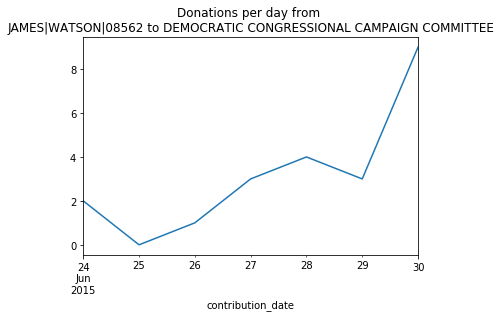

In [253]:
def plot_serial_donor(donor_id, candidate):
    
    donor = actblue.loc[
        lambda x: x["donor_id"] == donor_id
    ]
    
    res = (
        actblue
        .loc[
            lambda x: x["donor_id"] == donor_id
        ]
        .loc[
            lambda x: x["candidate_name"] == candidate
        ]
        .sort_values('contribution_date')
    )
    
    return (res
            .groupby(
                pd.Grouper(
                key = 'contribution_date',
                freq = "D"
                )
            )
            .count()
            ['filing_id']
            .plot(
                title = f"Donations per day from \n{donor_id} to {candidate}"
            )
        )
    
plot_serial_donor('JAMES|WATSON|08562', 'DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE')

## Codonors

How many donors gave to two different candidates?

In [254]:
candidate_pairs = (
    latest_contribs
    .rename(columns = {
        "candidate_name": "candidate"
    })
    [[
        "donor_id",
        "candidate"
    ]]
    # merge with itself?
    .pipe(lambda df: (
        df
        .merge(
            df,
            how = "left",
            on = "donor_id",
            suffixes = [ "_x", "_y" ],
        )
    ))
    # This filter prevents us from double-counting candidate-combinations
    .loc[lambda df: df["candidate_x"] < df["candidate_y"]]
    .sort_values([
        "candidate_x",
        "candidate_y",
        "donor_id"
    ])
)

candidate_pairs.head(10)

,donor_id,candidate_x,candidate_y
478494,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,314 PAC
478495,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,ADVANTAGE 2020
174523,GERALD|HALPERN|11021,21ST CENTURY DEMOCRATS,AL FRANKEN FOR SENATE
478496,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,AL FRANKEN FOR SENATE
282327,KATHERINE|KAHAN|10021,21ST CENTURY DEMOCRATS,AMERICANS FOR RESPONSIBLE SOLUTIONS PAC
308770,LEW|DOUGLAS|94618,21ST CENTURY DEMOCRATS,AMERICANS FOR RESPONSIBLE SOLUTIONS PAC
478497,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,AMERICANS FOR RESPONSIBLE SOLUTIONS PAC
254515,JOHN|ROSENFELD|90049,21ST CENTURY DEMOCRATS,AMERIPAC
478498,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,AMERIPAC
490747,STEPHEN|SWITZER|08736,21ST CENTURY DEMOCRATS,AMERIPAC


Identify the most common two-candidate combinations

In [255]:
pair_counts = (
    candidate_pairs
    .groupby([
        "candidate_x",
        "candidate_y",
    ])
    .size()
    .to_frame("count")
    .sort_values("count", ascending = False)
    .reset_index()
)

pair_counts.to_csv(
    "../output/candidate-pair-counts.csv",
    index = False
)

log(   
    pair_counts.sort_values("count", ascending = False)[0:25],
    "Most common two-candidate combinations"
)

Most common two-candidate combinations:


,candidate_x,candidate_y,count
0,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,4110
1,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,END CITIZENS UNITED PAC,2463
2,BERNIE 2016,END CITIZENS UNITED PAC,2144
3,BERNIE 2016,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,2095
4,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,NANCY PELOSI FOR CONGRESS,1497
5,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,END CITIZENS UNITED PAC,1389
6,END CITIZENS UNITED PAC,RUSS FOR WISCONSIN,1384
7,BERNIE 2016,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,1299
8,CATHERINE CORTEZ MASTO FOR SENATE,RUSS FOR WISCONSIN,1199
9,CATHERINE CORTEZ MASTO FOR SENATE,KAMALA HARRIS FOR SENATE,1174


Calculate candidate triplets

In [256]:
candidate_triplets = (
    latest_contribs
    .rename(columns = {
        "candidate_name": "candidate"
    })
    [[
        "donor_id",
        "candidate"
    ]]
    .pipe(lambda df: (
        df
        .merge(
            df,
            how = "left",
            on = "donor_id",
            suffixes = [ "_x", "_y" ],
        )
        .merge(
            df.rename(columns = { "candidate": "candidate_z" }),
            how = "left",
            on = "donor_id",
        )
    ))
    # This filter prevents us from double-counting candidate-combinations
    .loc[lambda df: df["candidate_x"] < df["candidate_y"]]
    .loc[lambda df: df["candidate_y"] < df["candidate_z"]]
    .sort_values([
        "candidate_x",
        "candidate_y",
        "candidate_z",
        "donor_id"
    ])
)

candidate_triplets.head()

,donor_id,candidate_x,candidate_y,candidate_z
3978864,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,314 PAC,ADVANTAGE 2020
3978865,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,314 PAC,AL FRANKEN FOR SENATE
3978866,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,314 PAC,AMERICANS FOR RESPONSIBLE SOLUTIONS PAC
3978867,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,314 PAC,AMERIPAC
3978868,SONIA|IMMASCHE|80524,21ST CENTURY DEMOCRATS,314 PAC,ARIZONA STATE DEMOCRATIC CENTRAL EXECUTIVE COMMITTEE


Identify the most common three-candidate combinations

In [257]:
triplet_counts = (
    candidate_triplets
    .groupby([
        "candidate_x",
        "candidate_y",
        "candidate_z",
    ])
    .size()
    .to_frame("count")
    .sort_values("count", ascending = False)
    .reset_index()
)

triplet_counts.to_csv(
    "../output/candidate-triplet-counts.csv",
    index = False
)

log(
    triplet_counts.sort_values("count", ascending = False)[0:25], 
    "Most common three candidate combinations"
   )

Most common three candidate combinations:


,candidate_x,candidate_y,candidate_z,count
0,CATHERINE CORTEZ MASTO FOR SENATE,KAMALA HARRIS FOR SENATE,RUSS FOR WISCONSIN,1096
1,CATHERINE CORTEZ MASTO FOR SENATE,ELIZABETH FOR MA,RUSS FOR WISCONSIN,1051
2,ELIZABETH FOR MA,KAMALA HARRIS FOR SENATE,RUSS FOR WISCONSIN,1049
3,CATHERINE CORTEZ MASTO FOR SENATE,ELIZABETH FOR MA,KAMALA HARRIS FOR SENATE,1049
4,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,END CITIZENS UNITED PAC,681
5,DONNA EDWARDS FOR SENATE,KAMALA HARRIS FOR SENATE,TAMMY FOR ILLINOIS,550
6,DONNA EDWARDS FOR SENATE,GILLIBRAND FOR SENATE,TAMMY FOR ILLINOIS,527
7,GILLIBRAND FOR SENATE,KAMALA HARRIS FOR SENATE,TAMMY FOR ILLINOIS,523
8,DONNA EDWARDS FOR SENATE,GILLIBRAND FOR SENATE,KAMALA HARRIS FOR SENATE,520
9,BERNIE 2016,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,END CITIZENS UNITED PAC,474


## Donation timing

How many donations per day did the candidates get over all months?

Number of unique donors per day, 1/1/2019 through 6/30/2019


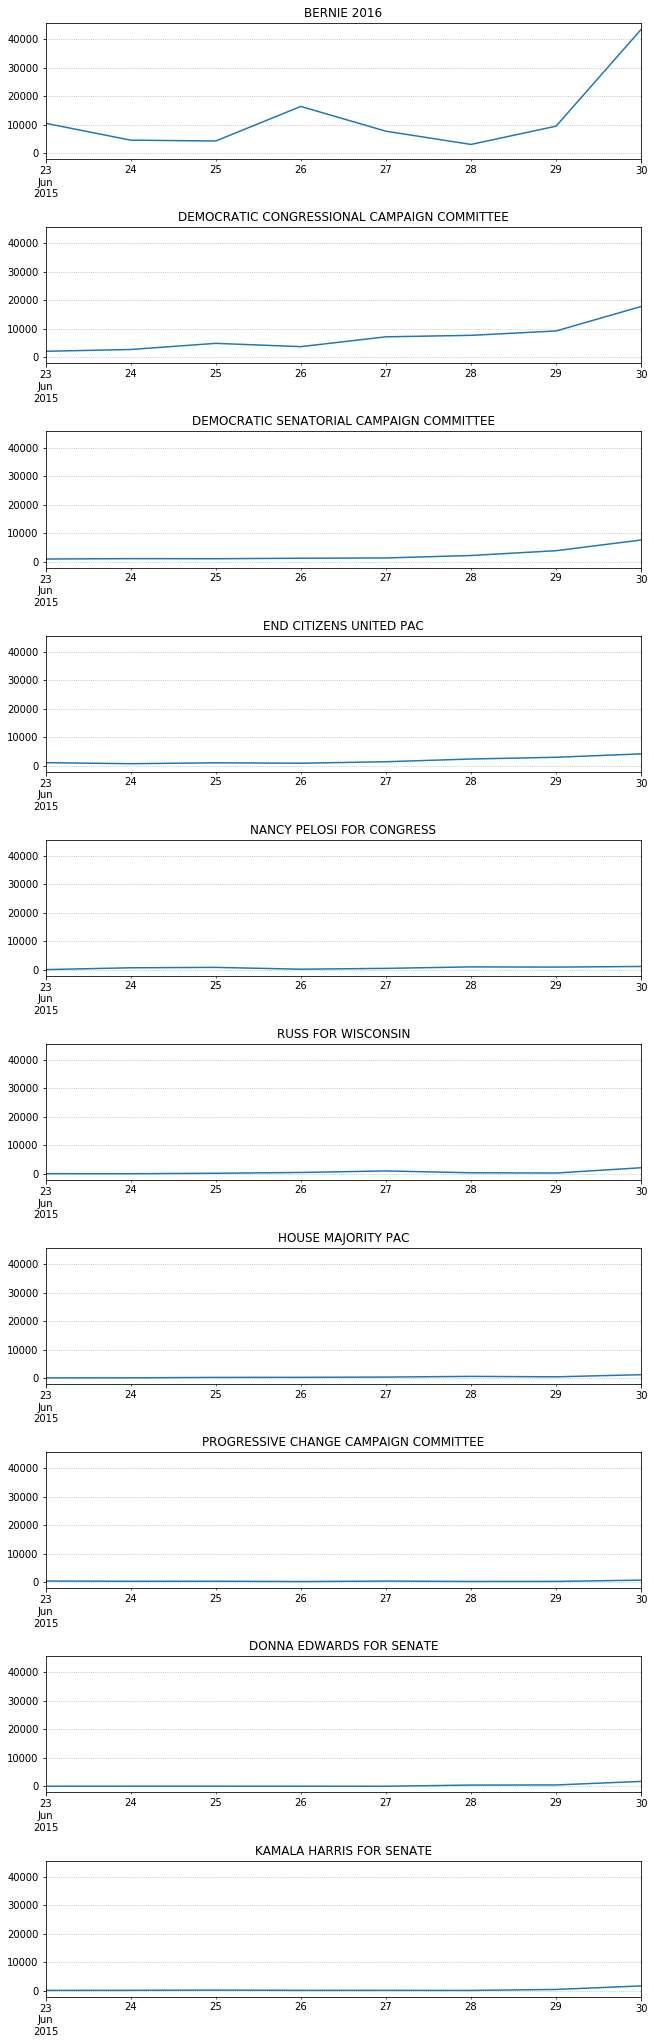

In [258]:
# Get list of candidates

# candidates_list = actblue['candidate_name'].dropna().unique() # USE THIS FOR 2020
candidate_list = ( 
    actblue
    .groupby('candidate_name')
    .count()
    .reset_index()
    .sort_values(
        'filing_id', 
        ascending = False
    )
    ['candidate_name'][0:10].tolist()
)

print("Number of unique donors per day, 1/1/2019 through 6/30/2019")

# Set up small multiples
fig, axes = plt.subplots( 
    nrows = len(candidate_list), 
    ncols = 1, 
    figsize = (9, 2.8 * len(candidate_list)),     
    sharey = True,
)

plt.tight_layout()

# Make sure there is enough veritcal room between plots
plt.subplots_adjust(hspace = 0.5)

# For each candidate plot their yearly 
for idx, each in enumerate(candidate_list):
    ax = axes[idx]
    
    ax = (
        actblue
        .loc[
            lambda x: actblue['candidate_name'] == each
        ]
        .set_index('contribution_date')
        .groupby(
            pd.Grouper(
                freq = 'D'
            )
        )['donor_id']
        .nunique()
        .plot(
        ax = ax,
        title = each
        )
    )
    
    tick_spacing = 10000

    ax.yaxis.set_major_locator(
        ticker.MultipleLocator(tick_spacing)
    )
    
    ax.yaxis.grid(which = "major", linestyle = ":")
    
#     # One year limit
#     ax.set_xlim(
#         [datetime.datetime(2019,1,1), datetime.datetime(2019,7,31)]) # USE THIS FOR 2020
    
    
    # Remove x labels for all but last plot
    if idx != (len(candidates) - 1):
        ax.set_xlabel("")
        
fig.savefig("../output/donors_per_day.png", dpi = 180)

View just one candidate's daily donation history

In [259]:
def donor_history(candidate_name = "HILLARY FOR AMERICA"):
    res = (
        actblue
        .loc[
            lambda x: x['candidate_name'] == candidate_name
        ]
        .set_index('contribution_date')
        .groupby(
            pd.Grouper(
                freq = 'D'
            )
        )
        ['donor_id']
        .nunique()
        .reset_index()
#         .assign(
#             candidate_name = candidate_name
#         )
        .rename(columns = {"donor_id": "donors"})
    )
 
    return res

In [260]:
donor_history("BERNIE 2016")

,contribution_date,donors
0,2015-06-23,10512
1,2015-06-24,4587
2,2015-06-25,4285
3,2015-06-26,16417
4,2015-06-27,7724
5,2015-06-28,3085
6,2015-06-29,9497
7,2015-06-30,43453


Function for getting more narrow windows

In [261]:
def get_window(candidate_name, start_date, end_date, spacing = 1000):
    
    start = parse(start_date)
    end = parse(end_date)

    fig, ax = plt.subplots( 
        nrows = 1, 
        ncols = 1, 
        figsize = (16, 6), 
    )
    
    ax = (
        actblue
        .loc[
            lambda x: x['candidate_name'] == candidate_name
        ]
        .set_index('contribution_date')
        .groupby(
            pd.Grouper(
                freq = 'D'
            )
        )['donor_id']
        .nunique()
        .plot(
            ax = ax,
        )
    )
    
    ax.set_xlabel("Contribution Date", fontsize = 18)
    fig.suptitle(candidate_name,fontsize = 24,)
    ax.set_title("Number of donors per day", fontsize = 16)

    tick_spacing = spacing

    ax.yaxis.set_major_locator(
        ticker.MultipleLocator(tick_spacing)
    )
    
    ax.yaxis.grid(which = "major", linestyle = ":")

    
    # One year limit
    ax.set_xlim(
        [start, end]
    )
    

For week around first debate (6/26)

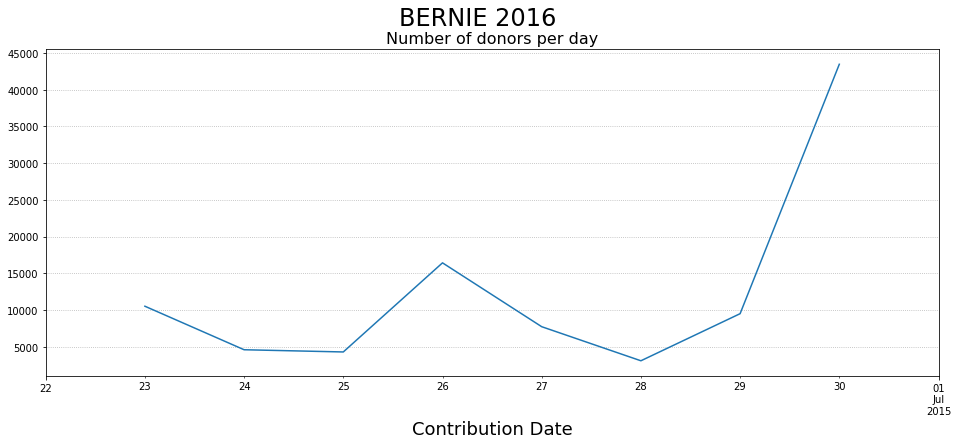

In [262]:
get_window("BERNIE 2016", "6/22/2015", "7/1/2015", 5000)

Biggest days for each candidate

In [263]:
for each in candidate_list: # use the candidate list defined above

    top_days = (
        actblue
        .loc[
            lambda x: x['candidate_name'] == each
        ]
        .groupby([
            pd.Grouper(
                key = "contribution_date",
                freq = 'D'
            ),
            "candidate_name",
        ])
        ["donor_id"]
        .nunique()
        .to_frame("donor_count")
        .reset_index()
        .sort_values('donor_count', ascending = False)
        [0:10]
        .assign(
            contribution_date = lambda df: df['contribution_date'].dt.strftime("%m/%d/%Y")
        )
    )

    # Output goes to log, not standard out, because of loop
    log(top_days, f"Top 10 days for {each}")
    
    display(top_days)

Top 10 days for BERNIE 2016:


,contribution_date,candidate_name,donor_count
7,06/30/2015,BERNIE 2016,43453
3,06/26/2015,BERNIE 2016,16417
0,06/23/2015,BERNIE 2016,10512
6,06/29/2015,BERNIE 2016,9497
4,06/27/2015,BERNIE 2016,7724
1,06/24/2015,BERNIE 2016,4587
2,06/25/2015,BERNIE 2016,4285
5,06/28/2015,BERNIE 2016,3085


Top 10 days for DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE:


,contribution_date,candidate_name,donor_count
7,06/30/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,17858
6,06/29/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,9256
5,06/28/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,7731
4,06/27/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,7209
2,06/25/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,4918
3,06/26/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,3761
1,06/24/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,2758
0,06/23/2015,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,2133


Top 10 days for DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE:


,contribution_date,candidate_name,donor_count
7,06/30/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,7545
6,06/29/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,3791
5,06/28/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,2107
4,06/27/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,1249
3,06/26/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,1146
1,06/24/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,1007
2,06/25/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,978
0,06/23/2015,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,876


Top 10 days for END CITIZENS UNITED PAC:


,contribution_date,candidate_name,donor_count
7,06/30/2015,END CITIZENS UNITED PAC,4133
6,06/29/2015,END CITIZENS UNITED PAC,2939
5,06/28/2015,END CITIZENS UNITED PAC,2329
4,06/27/2015,END CITIZENS UNITED PAC,1373
0,06/23/2015,END CITIZENS UNITED PAC,1047
2,06/25/2015,END CITIZENS UNITED PAC,997
3,06/26/2015,END CITIZENS UNITED PAC,850
1,06/24/2015,END CITIZENS UNITED PAC,686


Top 10 days for NANCY PELOSI FOR CONGRESS:


,contribution_date,candidate_name,donor_count
7,06/30/2015,NANCY PELOSI FOR CONGRESS,1167
5,06/28/2015,NANCY PELOSI FOR CONGRESS,1017
6,06/29/2015,NANCY PELOSI FOR CONGRESS,944
2,06/25/2015,NANCY PELOSI FOR CONGRESS,850
1,06/24/2015,NANCY PELOSI FOR CONGRESS,706
4,06/27/2015,NANCY PELOSI FOR CONGRESS,501
3,06/26/2015,NANCY PELOSI FOR CONGRESS,206
0,06/23/2015,NANCY PELOSI FOR CONGRESS,65


Top 10 days for RUSS FOR WISCONSIN:


,contribution_date,candidate_name,donor_count
7,06/30/2015,RUSS FOR WISCONSIN,2178
4,06/27/2015,RUSS FOR WISCONSIN,1051
3,06/26/2015,RUSS FOR WISCONSIN,522
5,06/28/2015,RUSS FOR WISCONSIN,412
6,06/29/2015,RUSS FOR WISCONSIN,318
2,06/25/2015,RUSS FOR WISCONSIN,242
0,06/23/2015,RUSS FOR WISCONSIN,104
1,06/24/2015,RUSS FOR WISCONSIN,80


Top 10 days for HOUSE MAJORITY PAC:


,contribution_date,candidate_name,donor_count
7,06/30/2015,HOUSE MAJORITY PAC,1190
5,06/28/2015,HOUSE MAJORITY PAC,595
6,06/29/2015,HOUSE MAJORITY PAC,443
4,06/27/2015,HOUSE MAJORITY PAC,357
3,06/26/2015,HOUSE MAJORITY PAC,267
2,06/25/2015,HOUSE MAJORITY PAC,240
1,06/24/2015,HOUSE MAJORITY PAC,92
0,06/23/2015,HOUSE MAJORITY PAC,68


Top 10 days for PROGRESSIVE CHANGE CAMPAIGN COMMITTEE:


,contribution_date,candidate_name,donor_count
7,06/30/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,735
0,06/23/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,429
4,06/27/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,408
2,06/25/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,359
1,06/24/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,339
6,06/29/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,290
5,06/28/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,272
3,06/26/2015,PROGRESSIVE CHANGE CAMPAIGN COMMITTEE,242


Top 10 days for DONNA EDWARDS FOR SENATE:


,contribution_date,candidate_name,donor_count
7,06/30/2015,DONNA EDWARDS FOR SENATE,1746
6,06/29/2015,DONNA EDWARDS FOR SENATE,498
5,06/28/2015,DONNA EDWARDS FOR SENATE,459
1,06/24/2015,DONNA EDWARDS FOR SENATE,82
2,06/25/2015,DONNA EDWARDS FOR SENATE,82
3,06/26/2015,DONNA EDWARDS FOR SENATE,51
0,06/23/2015,DONNA EDWARDS FOR SENATE,45
4,06/27/2015,DONNA EDWARDS FOR SENATE,44


Top 10 days for KAMALA HARRIS FOR SENATE:


,contribution_date,candidate_name,donor_count
7,06/30/2015,KAMALA HARRIS FOR SENATE,1611
6,06/29/2015,KAMALA HARRIS FOR SENATE,376
2,06/25/2015,KAMALA HARRIS FOR SENATE,157
1,06/24/2015,KAMALA HARRIS FOR SENATE,68
4,06/27/2015,KAMALA HARRIS FOR SENATE,62
3,06/26/2015,KAMALA HARRIS FOR SENATE,60
0,06/23/2015,KAMALA HARRIS FOR SENATE,51
5,06/28/2015,KAMALA HARRIS FOR SENATE,38


Check notebook timing

In [264]:
end = datetime.datetime.now()

d = (end - start)

f"The notebook ran for {round(d.total_seconds() / 60, 2) } minutes"

'The notebook ran for 0.31 minutes'

---

---

---